In [11]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from tqdm import tqdm

from dataset.dataset import NoCDataset
from model.vanilla import VanillaModel


In [12]:
from dgl.dataloading import GraphDataLoader
from torch.utils.data.sampler import SubsetRandomSampler

dataset = NoCDataset()
print(f"#Samples = {len(dataset)}")

print(dataset[0])

num_examples = len(dataset)
num_train = int(num_examples * 0.9)

train_sampler = SubsetRandomSampler(torch.arange(num_train))
test_sampler = SubsetRandomSampler(torch.arange(num_train, num_examples))

train_dataloader = GraphDataLoader(
    dataset, sampler=train_sampler, batch_size=1, drop_last=False)
test_dataloader = GraphDataLoader(
    dataset, sampler=test_sampler, batch_size=1, drop_last=False)


#Samples = 2703
(Graph(num_nodes={'packet': 12, 'router': 12},
      num_edges={('packet', 'pass', 'router'): 52, ('router', 'backpressure', 'router'): 16, ('router', 'connect', 'router'): 16, ('router', 'transfer', 'packet'): 52},
      metagraph=[('packet', 'router', 'pass'), ('router', 'router', 'backpressure'), ('router', 'router', 'connect'), ('router', 'packet', 'transfer')]), tensor([0.1300, 0.9915, 0.1300, 0.9915]))


In [13]:
device = "cpu"
# device = "cuda:0"

model = VanillaModel().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
losses = []

epoches = 30
for e in range(epoches):
    print("#" * 60)
    print(f"epoch = {e}")
    print("#" * 60)

    pbar = tqdm(train_dataloader)

    for i, data in enumerate(pbar):

        g, congestion = data
        g = g.to(device)

        pred = model(g)
        loss = F.mse_loss(pred, congestion)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if i % 30 == 0:
            losses.append(loss.item())
            pbar.set_postfix(loss=loss.item())



############################################################
epoch = 0
############################################################


  0%|          | 0/2432 [00:00<?, ?it/s]/home/xuechenhao/anaconda3/envs/py38/lib/python3.8/site-packages/torch/amp/autocast_mode.py:198: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
100%|██████████| 2432/2432 [00:20<00:00, 116.66it/s, loss=0.0219]


############################################################
epoch = 1
############################################################


100%|██████████| 2432/2432 [00:20<00:00, 117.83it/s, loss=0.303]   


############################################################
epoch = 2
############################################################


100%|██████████| 2432/2432 [00:20<00:00, 120.01it/s, loss=0.00761] 


############################################################
epoch = 3
############################################################


100%|██████████| 2432/2432 [00:20<00:00, 118.60it/s, loss=0.00359] 


############################################################
epoch = 4
############################################################


100%|██████████| 2432/2432 [00:20<00:00, 118.74it/s, loss=0.00124] 


############################################################
epoch = 5
############################################################


100%|██████████| 2432/2432 [00:20<00:00, 117.60it/s, loss=0.00884] 


############################################################
epoch = 6
############################################################


100%|██████████| 2432/2432 [00:20<00:00, 117.62it/s, loss=0.00496] 


############################################################
epoch = 7
############################################################


100%|██████████| 2432/2432 [00:20<00:00, 118.59it/s, loss=0.00183] 


############################################################
epoch = 8
############################################################


100%|██████████| 2432/2432 [00:20<00:00, 117.30it/s, loss=0.0176]  


############################################################
epoch = 9
############################################################


100%|██████████| 2432/2432 [00:20<00:00, 118.97it/s, loss=0.0246]  


############################################################
epoch = 10
############################################################


100%|██████████| 2432/2432 [00:20<00:00, 119.95it/s, loss=0.212]   


############################################################
epoch = 11
############################################################


100%|██████████| 2432/2432 [00:20<00:00, 119.55it/s, loss=0.00277] 


############################################################
epoch = 12
############################################################


100%|██████████| 2432/2432 [00:20<00:00, 118.54it/s, loss=0.00143] 


############################################################
epoch = 13
############################################################


100%|██████████| 2432/2432 [00:20<00:00, 118.66it/s, loss=0.00025] 


############################################################
epoch = 14
############################################################


100%|██████████| 2432/2432 [00:20<00:00, 118.28it/s, loss=0.00754] 


############################################################
epoch = 15
############################################################


100%|██████████| 2432/2432 [00:20<00:00, 115.89it/s, loss=0.0862]  


############################################################
epoch = 16
############################################################


100%|██████████| 2432/2432 [00:20<00:00, 116.39it/s, loss=0.00376] 


############################################################
epoch = 17
############################################################


100%|██████████| 2432/2432 [00:20<00:00, 118.00it/s, loss=0.00646] 


############################################################
epoch = 18
############################################################


100%|██████████| 2432/2432 [00:20<00:00, 118.15it/s, loss=0.00478] 


############################################################
epoch = 19
############################################################


100%|██████████| 2432/2432 [00:20<00:00, 118.54it/s, loss=0.211]   


############################################################
epoch = 20
############################################################


100%|██████████| 2432/2432 [00:20<00:00, 117.27it/s, loss=0.17]    


############################################################
epoch = 21
############################################################


100%|██████████| 2432/2432 [00:20<00:00, 117.14it/s, loss=0.065]   


############################################################
epoch = 22
############################################################


100%|██████████| 2432/2432 [00:20<00:00, 118.65it/s, loss=0.0039]  


############################################################
epoch = 23
############################################################


100%|██████████| 2432/2432 [00:20<00:00, 116.52it/s, loss=0.000659]


############################################################
epoch = 24
############################################################


100%|██████████| 2432/2432 [00:20<00:00, 117.89it/s, loss=0.179]   


############################################################
epoch = 25
############################################################


100%|██████████| 2432/2432 [00:20<00:00, 118.60it/s, loss=0.0119]  


############################################################
epoch = 26
############################################################


100%|██████████| 2432/2432 [00:20<00:00, 118.17it/s, loss=0.00456] 


############################################################
epoch = 27
############################################################


100%|██████████| 2432/2432 [00:20<00:00, 116.62it/s, loss=0.00301] 


############################################################
epoch = 28
############################################################


100%|██████████| 2432/2432 [00:20<00:00, 118.12it/s, loss=0.00155] 


############################################################
epoch = 29
############################################################


100%|██████████| 2432/2432 [00:20<00:00, 117.59it/s, loss=0.0252]  


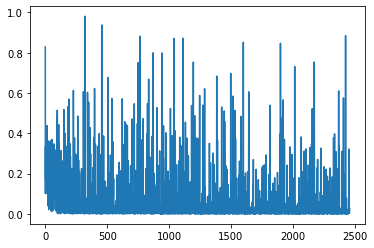

In [14]:
plt.plot(losses)

 38%|███▊      | 103/271 [00:00<00:00, 201.82it/s]/tmp/ipykernel_10633/2863142351.py:22: RuntimeWarning: divide by zero encountered in float_scalars
  pred_slope = [pred[1] / pred[0], pred[3] / pred[2]]
100%|██████████| 271/271 [00:01<00:00, 206.84it/s]


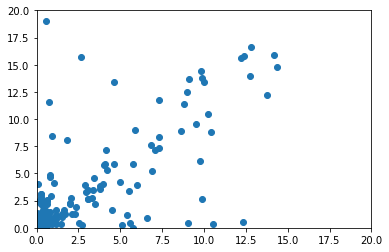

In [16]:
# test accuracy
# we use relative error to measure

mae_losses = []
x = []
y = []

pbar = tqdm(test_dataloader)
for i, data in enumerate(pbar):

    g, congestion = data
    congestion = congestion
    g = g.to(device)

    pred = model(g)
    pred = F.relu(pred)
    loss = F.mse_loss(pred, congestion)

    pred = pred.detach().squeeze().numpy()
    congestion = congestion.squeeze().numpy()

    pred_slope = [pred[1] / pred[0], pred[3] / pred[2]]
    real_slope = [congestion[1] / congestion[0], congestion[3] / congestion[2]]

    # print(f"iteration: {i}; loss = {loss.item()}")
    # print(f"pred = {pred}")
    # print(f"congestion = {congestion}")

    x.append(abs(real_slope[0] - pred_slope[0]))
    y.append(abs(real_slope[1] - pred_slope[1]))

plt.xlim(0, 20)
plt.ylim(0, 20)
plt.scatter(x, y)
